### Libaries and functions

In [ ]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
import keras.backend as K
import random
import pickle

In [ ]:
random.seed(1)
tf.random.set_seed(1)

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In the refit dataset we have datas about aggregate consumption and 9 appliances, since the monitored appliances change in every house the first think we want to do is to create a table that connect sensor data with appliances.

As example the element in position 2,1 of the following list is 'Fridge-Freezer' that mean that appliance1 in house2 is 'Fridge-Freezer'

In [ ]:
labels_matrix=[
    [],
    ['Fridge', 'Chest Freezer', 'Upright Freezer', 'Tumble dryer', 'Washing machine', 'Dishwasher', 'Computer Site', 'Television Site', 'Electric Heater' ],
    ['Fridge-Freezer', 'Whasing machine', 'Dishwasher', 'Television', 'Microwave', 'Toaster', 'Hi-fi', 'Kettle', 'Oven extractor fan'],
    ['Toaster', 'Fridge-Freezer', 'Freezer', 'Tumble dryer', 'Dishwasher', 'Washing machine', 'Television', 'Microwave', 'Kettle'],
    ['Fridge', 'Freezer', 'Fridge-Freezer', 'Washing Machine', 'Washing Machine', 'Computer Site', 'Television Site', 'Microwave', 'Kettle'],
    ['Fridge-Freezer', 'Tumble Dryer', 'Washing Machine', 'Dishwasher', 'Computer Site', 'Television Site', 'Combination Microwave', 'Kettle', 'Toaster'],
    ['Freezer (Utility Room)', 'Washing Machine', 'Dishwasher', 'MJY Computer', 'Television Site', 'Microwave', 'Kettle', 'Toaster', 'PGM Computer'],
    ['Fridge', 'Freezer (Garage)', 'Freezer', 'Tumble Dryer', 'Washing Machine', 'Dishwasher', 'Television Site', 'Toaster', 'Kettle'],
    ['Fridge', 'Freezer', 'Dryer', 'Washing Machine', 'Toaster', 'Computer', 'Television Site', 'Microwave', 'Kettle'],
    ['Fridge-Freezer', 'Washer Dryer', 'Washing Machine', 'Dishwasher', 'Television Site', 'Microwave', 'Kettle', 'Hi-Fi', 'Electric Heater'],
    ['Magimix (Blender)', 'Freezer (then changed in Toaster)', 'Chest Freezer (In Garage)', 'Fridge-Freezer', 'Washing Machine', 'Dishwasher', 'Television Site', 'Microwave', 'Kenwood KMix'],
    ['Fridge', 'Fridge-Freezer', 'Washing Machine', 'Dishwasher', 'Computer site', 'Microwave', 'Kettle', 'Router', 'Hi-fi'],
    ['Fridge-Freezer', 'Television Site(Lounge)', 'Microwave', 'Kettle', 'Toaster', 'Television Site(Bedroom)', 'Not Used', 'Not Used', 'Not Used'],
    ['Television Site', 'Unknown', 'Washing Machine', 'Dishwasher', 'Tumble Dryer', 'Television Site', 'Computer Site', 'Microwave', 'Kettle'],
    [],
    ['Fridge-Freezer', 'Tumble Dryer', 'Washing Machine', 'Dishwasher', 'Computer Site', 'Television Site', 'Microwave', 'Kettle' , 'Toaster'],
    ['Fridge-Freezer', 'Fridge-Freezer', 'Electric Heater', 'Electric Heater', 'Washing Machine', 'Dishwasher', 'Computer Site', 'Television Site', 'Dehumidifier/Heater'],
    ['Freezer (Garage)', 'Fridge-Freezer', 'Tumble Dryer (Garage)', 'Washing Machine', 'Computer Site', 'Television Site', 'Microwave', 'Kettle', 'Plug Site (Bedroom)'],
    ['Fridge(garage)', 'Freezer(garage)', 'Fridge-Freezer', 'Washer Dryer(garage)', 'Washing Machine', 'Dishwasher', 'Desktop Computer', 'Television Site', 'Microwave'],
    ['Fridge & Freezer', 'Washing Machine', 'Television Site', 'Microwave', 'Kettle', 'Toaster', 'Bread-maker', 'Lamp (80Watts)', 'Hi-Fi'],
    ['Fridge', 'Freezer', 'Tumble Dryer', 'Washing Machine', 'Dishwasher', 'Computer Site', 'Television Site', 'Microwave', 'Kettle'],
    ['Fridge-Freezer', 'Tumble Dryer', 'Washing Machine', 'Dishwasher', 'Food mixer', 'Television Site', 'Kettle/Toaster', 'Vivarium', 'Pond-Pump']
]

then we need to manage a matrix that allow us to handle Appliances that are reported with different names among houses.

In this phase i decided to ignore the appliances that are present in less than 3 houses and all the data streams in which we don't know exactly what appliance is attached like plug sites, television sites and computer sites.

Also since the most of time there was a single appliance for Fridge and Freezer, and some times they were connected to the same smart plug, I decided to consider fridges and freezers as a single type of appliances

In [ ]:
sinonims_matrix=[
    ['Fridge-Freezer', 'Fridge', 'Freezer','Freezer (Garage)', 'Chest Freezer', 'Upright Freezer', 'Freezer (Utility Room)', 'Chest Freezer (In Garage)', 'Freezer (Garage)', 'Fridge & Freezer'],
    ['Kettle'],
    ['Toaster'],
    ['Dryer', 'Tumble Dryer', 'Tumble dryer', 'Tumble Dryer (Garage)'], #i ignored the washer dryer
    ['Washing Machine', 'Washing machine'],
    ['Dishwasher'],
    ['Microwave', 'Combination Microwave'],
    ['Electric Heater', 'Dehumidifier/Heater']
]

names=[]
for appliance in sinonims_matrix:
  names.append(appliance[0])

### Problems

In [ ]:
name='RAW_House1_Part1.csv'
name_2='RAW_House1_Part2.csv'
DATA_PATH = 'drive/MyDrive/Raw_data/{}'.format(name)
DATA_PATH_2 = 'drive/MyDrive/Raw_data/{}'.format(name_2)
data=pd.read_csv(DATA_PATH)
data_2=pd.read_csv(DATA_PATH_2)

In [ ]:
data

,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
0,2013-10-09 14:06:17,1381327577,523,74,0,69,0,0,0,0,0,1
1,2013-10-09 14:06:31,1381327591,526,75,0,69,0,0,0,0,0,1
2,2013-10-09 14:06:46,1381327606,540,74,0,68,0,0,0,0,0,1
3,2013-10-09 14:07:01,1381327621,532,74,0,68,0,0,0,0,0,1
4,2013-10-09 14:07:15,1381327634,540,74,0,69,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4377872,2014-10-01 01:26:38,1412126797,186,0,0,69,0,0,0,0,0,1
4377873,2014-10-01 01:26:51,1412126810,185,0,0,69,0,0,0,0,0,1
4377874,2014-10-01 01:26:52,1412126812,185,0,0,69,0,0,0,0,0,1
4377875,2014-10-01 01:27:07,1412126827,187,0,0,69,0,0,0,0,0,1


1- As we can see in the table above the sampling rate is not constant and the mesuarement is trasmitted only when there is a change in the load.

2- Timestamp errors

In [ ]:
data[249599:249603]

,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
249599,2013-10-27 01:59:47,1382839187,195,0,0,71,0,0,0,0,0,1
249600,2013-10-27 01:59:59,1382839198,197,0,0,70,0,0,0,0,0,1
249601,2013-10-27 01:00:01,1382835601,197,0,0,70,0,0,0,0,0,1
249602,2013-10-27 01:00:14,1382835614,196,0,0,70,0,0,0,0,0,1


in date 10-27 there was the change in clock time due to daylight saving time, this cause the timestamps to go backwards (this has been a huge problem, I spent hours debugging trying to figure out what was wrong in my code 😭).

Also some datas are present both in part 1 and part 2 of the data

In [ ]:
data_2[945399:945410]

,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9
945399,2014-10-01 01:26:39,1412126799,186.0,0.0,NaN,69.0,NaN,NaN,0.0,0.0,0.0,NaN
945400,2014-10-01 01:26:47,1412126807,185.0,0.0,NaN,69.0,0.0,NaN,NaN,0.0,0.0,NaN
945401,2014-10-01 01:26:55,1412126814,186.0,0.0,0.0,69.0,0.0,NaN,0.0,0.0,0.0,NaN
945402,2014-10-01 01:27:03,1412126823,185.0,0.0,0.0,69.0,0.0,NaN,NaN,0.0,0.0,NaN
945403,2014-10-01 01:27:11,1412126831,187.0,NaN,NaN,69.0,0.0,NaN,0.0,0.0,0.0,NaN
945404,2014-10-01 01:27:19,1412126838,187.0,0.0,0.0,70.0,0.0,NaN,0.0,0.0,0.0,NaN
945405,2014-10-01 01:27:27,1412126846,186.0,0.0,0.0,69.0,0.0,NaN,0.0,0.0,0.0,NaN
945406,2014-10-01 01:27:35,1412126855,187.0,0.0,0.0,70.0,0.0,NaN,0.0,0.0,0.0,NaN
945407,2014-10-01 01:27:43,1412126862,184.0,0.0,NaN,69.0,0.0,NaN,0.0,0.0,0.0,NaN
945408,2014-10-01 01:27:51,1412126870,185.0,0.0,0.0,70.0,0.0,NaN,0.0,0.0,0.0,NaN


for example if you pay attention you can notice how the data above taken from data_2 is equal to the last rows of data_1, and for unknown reasons data that are present in part one with a value correspond to row with Nan values in part 2

2-  Smart plugs do not cover all energy consumption

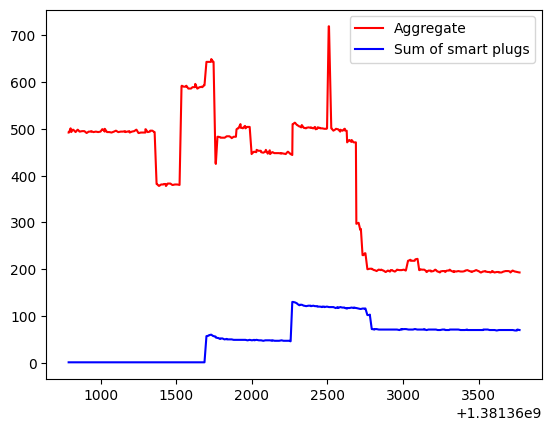

In [ ]:
start=4500
ran=500
end=start+ran

x=data['Unix'][start:end]
y=data['Aggregate'][start:end]

y_=data['Appliance1'][start:end]+data['Appliance2'][start:end]+data['Appliance3'][start:end]+data['Appliance4'][start:end]+data['Appliance5'][start:end]+data['Appliance6'][start:end]+data['Appliance7'][start:end]+data['Appliance8'][start:end]+data['Appliance9'][start:end]


plt.plot(x,y,color='red', label='Aggregate')
plt.plot(x,y_,color='blue', label='Sum of smart plugs')
plt.legend(loc="upper right")

3- Data may contain errors: in the following graph a peack is detected by the smart plug but this big variation is not measured by the smart meter, also values over 4000W are unrealistic

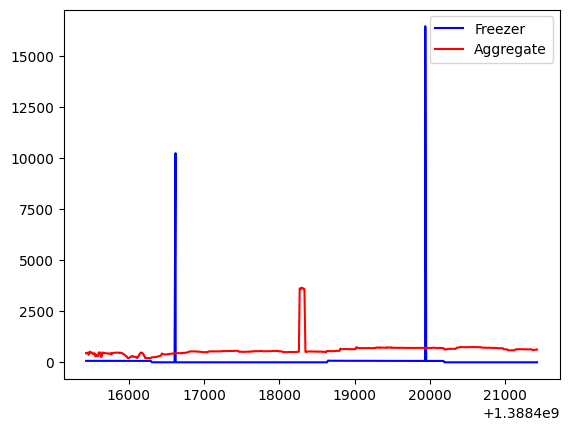

In [ ]:
start=1151700
ran=1000
end=start+ran

x=data['Unix'][start:end]
y=data['Aggregate'][start:end]

y_=data['Appliance3'][start:end]

plt.plot(x,y_, color='blue', label='Freezer')
plt.plot(x,y, color='red', label='Aggregate')
plt.legend(loc="upper right")

We have multiple solutions to manage the peaks, since the row with a peak is an anomalous information only for one appliance and I dont want to trow away all the data of all the other appliances i will change the value above 4000 with the value of the previous measurement.

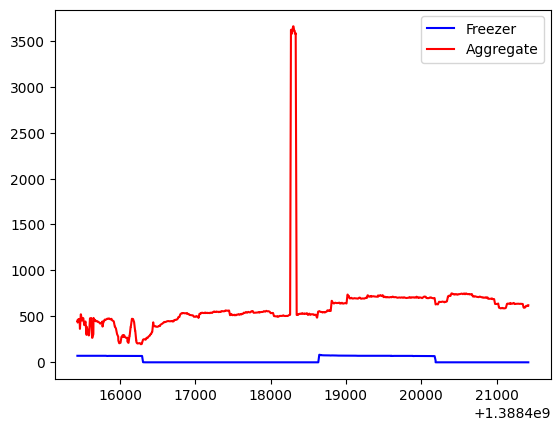

In [ ]:
y_=y_.to_numpy()
peak_indexes=[i for i, x in enumerate(y_>4000) if x]
for index in peak_indexes:
  y_[index]=y_[index-1]

plt.plot(x,y_, color='blue', label='Freezer')
plt.plot(x,y, color='red', label='Aggregate')
plt.legend(loc="upper right")

4- Each house has different appliances monitored, some house has two of the same type and other houses have multiple devices attached to the same smart plug

5- House 11 and 21 have solar panels, this leads to anomalous changes in the aggregate consumption according to the dataset description

6- smart plugs and smart meter not perfectly syncronized

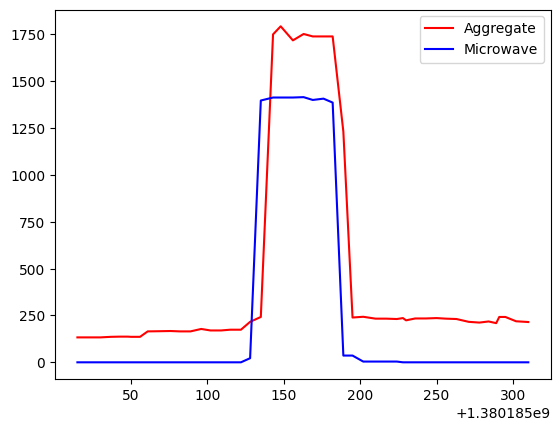

In [ ]:
name='RAW_House3_Part1.csv'
DATA_PATH = 'drive/MyDrive/Raw_data/{}'.format(name)
data_3=pd.read_csv(DATA_PATH)

start=7420
ran=50
end=start+ran

x=data_3['Unix'][start:end]
y=data_3['Aggregate'][start:end]

y_=data_3['Appliance8'][start:end]


plt.plot(x,y,color='red', label='Aggregate')
plt.plot(x,y_,color='blue', label='Microwave')
plt.legend(loc="upper right")

7) huge amount of noise is the aggregate, in the following examples we can see how difficult is to recognize the appliance pattern in the aggregate, in the second case the aggregate consumption is almost higher than the appliance consumption

(0.0, 800.0)

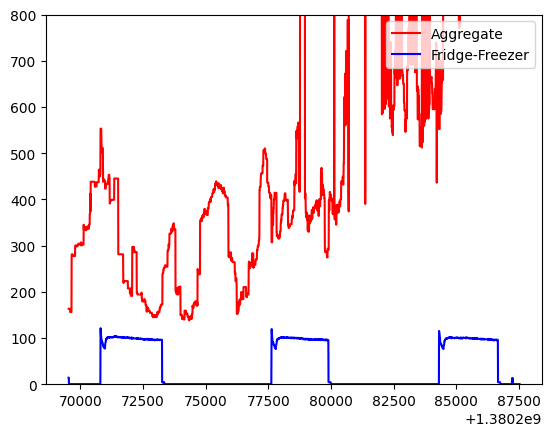

In [ ]:
start=21500
ran=3000
end=start+ran

x=data_3['Unix'][start:end]

y_=data_3['Appliance2'][start:end]
y=data_3['Aggregate'][start:end]

plt.plot(x,y,color='red', label='Aggregate')
plt.plot(x,y_,color='blue', label='Fridge-Freezer')
plt.legend(loc="upper right")
plt.ylim(0,800)

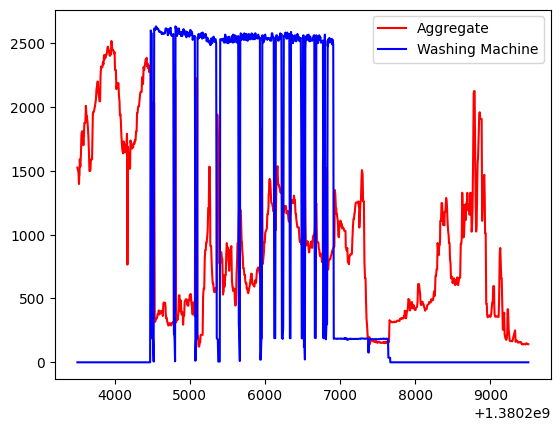

In [ ]:
start=10500
ran=1000
end=start+ran

x=data_3['Unix'][start:end]

y_=data_3['Appliance4'][start:end]
y=data_3['Aggregate'][start:end]

plt.plot(x,y,color='red', label='Aggregate')
plt.plot(x,y_,color='blue', label='Washing Machine')

plt.legend(loc="upper right")


### Modelling

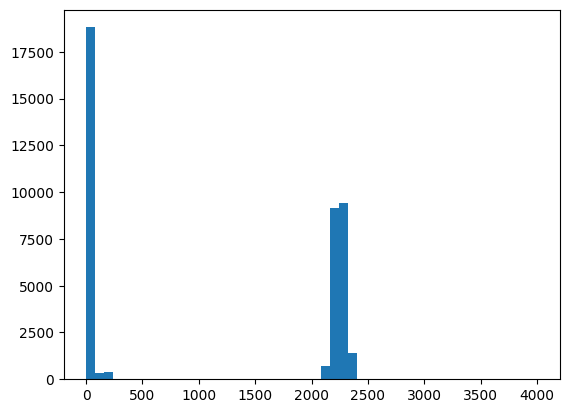

In [ ]:
x = data['Appliance6']
plt.hist(x, bins=50, range=(1,4000)) #I decided to start the histogram a 1, otherwise the large number of zero values will take all the screen
plt.show()

The histogram for the majority of Appliances look like this, there are two peacks, one at 0 corresponding to when the appliance is off while the second peak correspond to when the appliance is on.

However this does not mean that the same Appliance in different houses have the same peak position, in fact we can see as exemple the computer consumption in house 1 compared to house 5.

In [ ]:
name='RAW_House5_Part1.csv'
DATA_PATH = 'drive/MyDrive/Raw_data/{}'.format(name)
data_2=pd.read_csv(DATA_PATH)

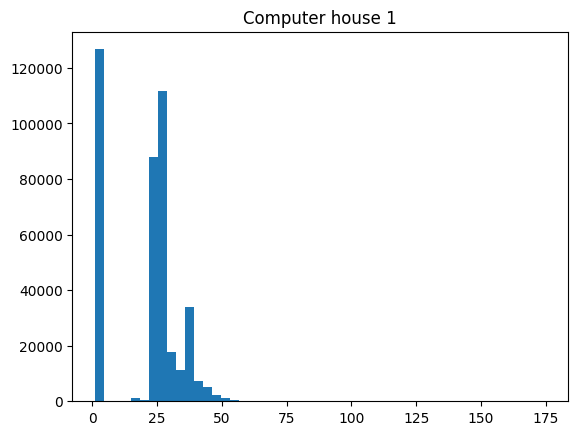

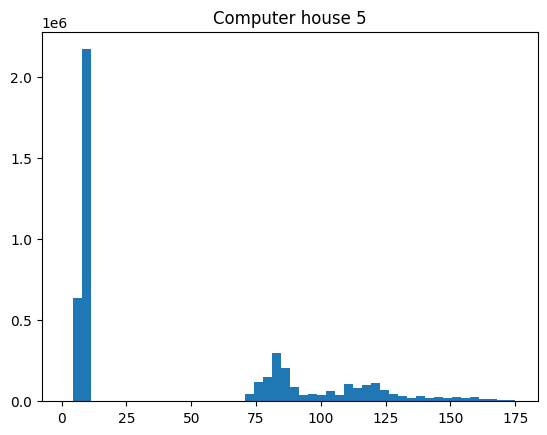

In [ ]:
x1 = data_2['Appliance5']
x2 = data['Appliance7']


plt.hist(x2, bins=50, range=(1,175))
plt.title('Computer house 1')
plt.show()

plt.hist(x1, bins=50, range=(1,175))
plt.title('Computer house 5')
plt.show()

the computer in house 5 also look like it have 2 peaks (one around 80 and one around 120), this is due to the fact that in the computer site in house 5 also the printer is connected, a possible solution to this problem can be to consider each appliance as a finite state machine (FNM) with more than 2 state.

One of the Appliances with clearly 2 states is the toaster

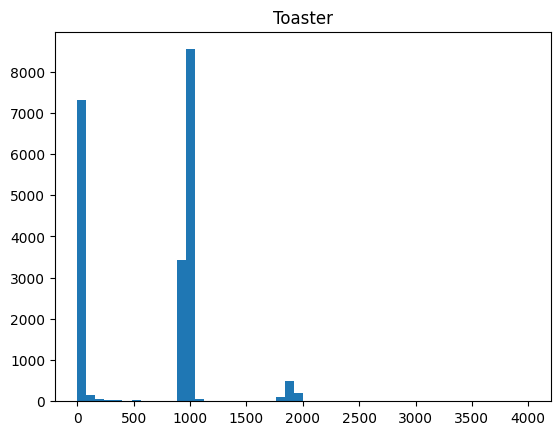

In [ ]:
name='RAW_House6_Part1.csv'
DATA_PATH = 'drive/MyDrive/Raw_data/{}'.format(name)
data=pd.read_csv(DATA_PATH)

x = data['Appliance8']
plt.hist(x, bins=50, range=(1,4000))
plt.title('Toaster')
plt.show()

the problem is even more complex since not in all the houses the toaster have this behaviour

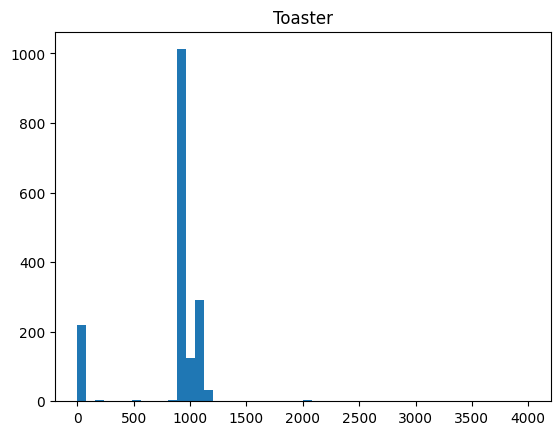

In [ ]:
name='RAW_House15_Part1.csv'
DATA_PATH = 'drive/MyDrive/Raw_data/{}'.format(name)
data=pd.read_csv(DATA_PATH)

x = data['Appliance9']
plt.hist(x, bins=50, range=(1,4000))
plt.title('Toaster')
plt.show()

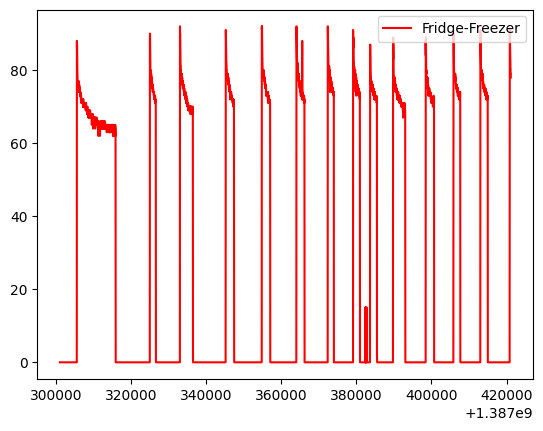

In [ ]:
start=0
ran=20000
end=start+ran

x=data['Unix'][start:end]

y=data['Appliance1'][start:end]


plt.plot(x,y,color='red', label='Fridge-Freezer')
plt.legend(loc="upper right")

I decided to treath all the appliances as on-off appliances by dividing their consumption with the value of the peack (in a way that the consumption is 1 when the appliance is on and 0 when the appliance is off) then values greather than 1 are rounded down to 1

### Activity time and patterns

since we want to make a downsamplit may be important to understand how many time Appliances stay on

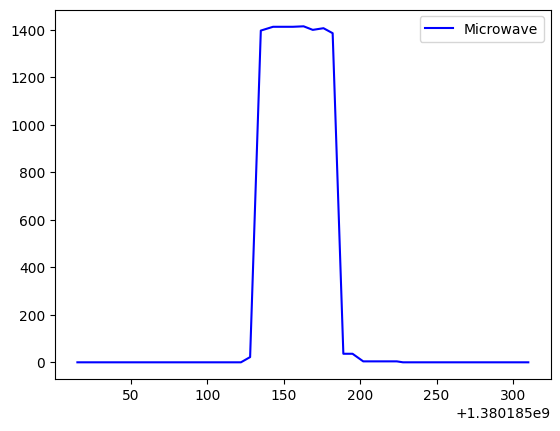

In [ ]:
start=7420
ran=50
end=start+ran

x=data_3['Unix'][start:end]

y_=data_3['Appliance8'][start:end]


plt.plot(x,y_,color='blue', label='Microwave')
plt.legend(loc="upper right")

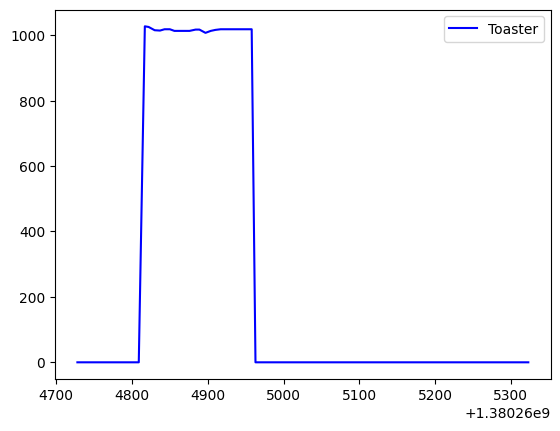

In [ ]:
start=20700
ran=100
end=start+ran

x=data_3['Unix'][start:end]

y_=data_3['Appliance1'][start:end]


plt.plot(x,y_,color='blue', label='Toaster')
plt.legend(loc="upper right")

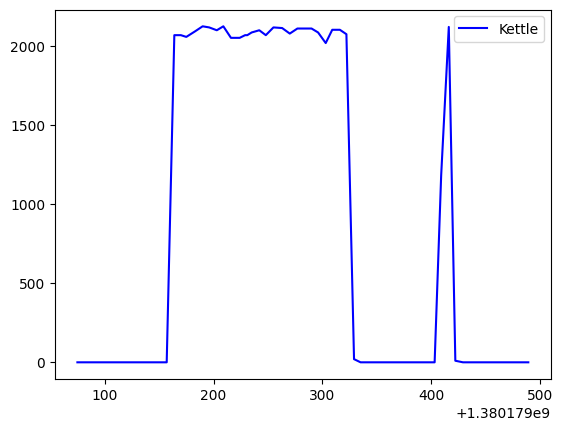

In [ ]:
start=6430
ran=70
end=start+ran

x=data_3['Unix'][start:end]

y_=data_3['Appliance9'][start:end]

plt.plot(x,y_,color='blue', label='Kettle')

plt.legend(loc="upper right")

From the graphs above we can see that the activity time of kettle, microwave, toaster is between 1-3 minutes

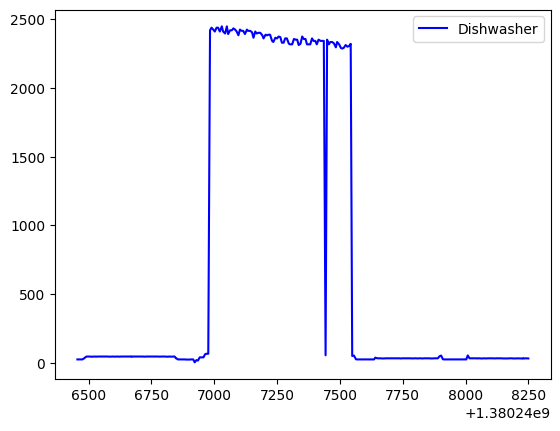

In [ ]:
start=8900
ran=300

end=start+ran

x=data_2['Unix'][start:end]

y_=data_2['Appliance4'][start:end]

plt.plot(x,y_, color='blue', label='Dishwasher')

plt.legend(loc="upper right")

(0.0, 800.0)

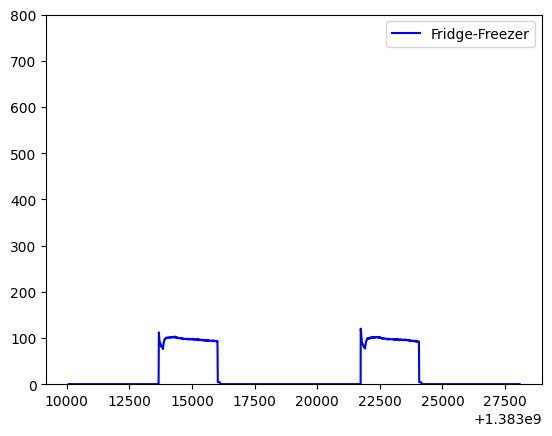

In [ ]:
start=450000
ran=3000
end=start+ran

x=data_3['Unix'][start:end]

y_=data_3['Appliance2'][start:end]

plt.plot(x,y_,color='blue', label='Fridge-Freezer')
plt.legend(loc="upper right")
plt.ylim(0,800)

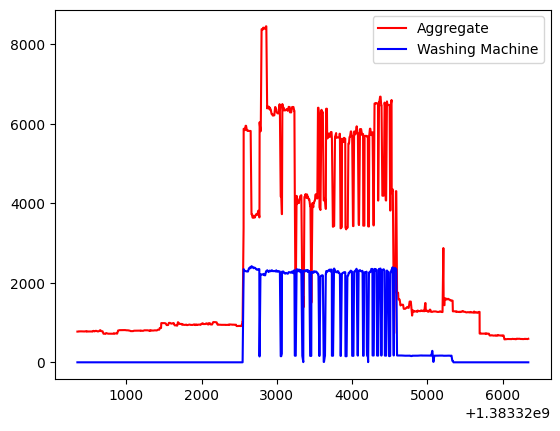

In [ ]:
start=501700
ran=1000
end=start+ran

x=data_3['Unix'][start:end]

y_=data_3['Appliance4'][start:end]
y=data_3['Aggregate'][start:end]

plt.plot(x,y,color='red', label='Aggregate')
plt.plot(x,y_,color='blue', label='Washing Machine')

plt.legend(loc="upper right")

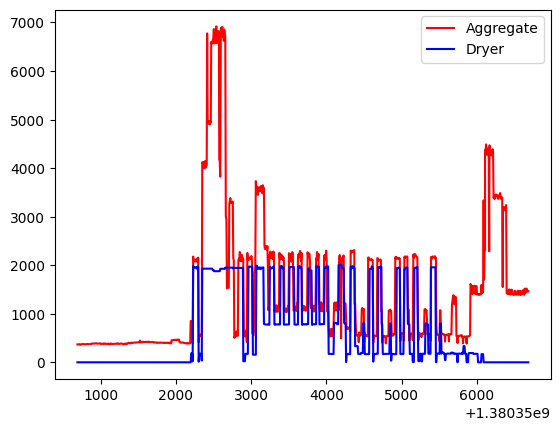

In [ ]:
start=25700
ran=1000
end=start+ran

x=data_2['Unix'][start:end]

y_=data_2['Appliance2'][start:end]
y=data_2['Aggregate'][start:end]

plt.plot(x,y,color='red', label='Aggregate')
plt.plot(x,y_,color='blue', label='Dryer')

plt.legend(loc="upper right")

For other appliances like fridge, washing machine and dryer the activity time is longer (activity times approximatively range from 10 to 60 minutes), but in this case the aggregate looks really noisy.

### Preprocessing

Now we need to understand how to perform preprocessing, we need to solve the following main problems:

1) not uniform sampling rate

2) NaN values and outliers

3) Noisy data

To solve the problem of the non-uniform sampling rate the best option is to perform a downsampling operetion: I will split the dataset in windows and from each window a single value is carried out, we have three things to decide: how large the window should be, how to summarize all the values in a window (mean, max, median...) and how to manage empty window.

-since we have some appliances that stay on for around 1 minute, having window bigger than one minute will be a bad choice if we are also interested in recognizing also this appliances

-for appliances like Washing machine and dryer there is an oscillation between the on state and the off state, so is better having a window smaller than the period of oscillation that i visually estimate to be around two minutes, this let me think that 10 seconds is a good length

-to summarize all the values inside a window an option could be a mean filter, althought using a mean filter may damage periodicity in the dryer that looks jump between two discrete values, this let me think that the best options are: chosing the value closest to the middle of the window or pick the median

-the median can be also an option to manage outliers and denoise the aggregate datas

-to fill a void windows I can copy the value of the previous window, making exeptions when there are a big number of void windows, in this case skipping them may be a better option



Cause of limited computational capability and high dimension of the dataset I wrote the following code to be time efficient, for this reason is avoided re-allocations and other computational expensive operations on dataframes. This unfortunately makes the code a little more complex.

In [ ]:
def downsampling_and_preprocessing(house_data, house):
  win_size=10

  #allocation and new dataframe creation
  length=house_data.shape[0]
  zero_data = np.zeros(shape=(length,len(names)+4))
  house_id = np.ones(shape=(length,1))*house

  house_dataframe = pd.DataFrame(zero_data, columns=['house_id', 'Time', 'Unix', 'Aggregate']+names)
  h = pd.DataFrame(house_id, columns=['house_id'])
  house_dataframe['house_id']=h
  house_dataframe['Time']=house_data['Time'].tolist()
  house_dataframe['Unix']=house_data['Unix'].tolist()
  house_dataframe['Aggregate']=house_data['Aggregate'].tolist()

  #for each appliance in the house
  for i in range(9):
    Appliance=labels_matrix[house][i]
    #if it is an interesting one
    for Appliance_set in sinonims_matrix:
      if Appliance in Appliance_set:
        #I add it to the Data Frame, note that we are considering the total consumption of appliances of the same type
        #(we are considering Fridge A and Fridge B as the same appliance)
        sum=house_dataframe[Appliance_set[0]].to_numpy().astype(int)+house_data['Appliance'+str(i+1)].to_numpy().astype(int)
        house_dataframe[Appliance_set[0]]=sum.tolist()
        print("la colonna " + str(i) + " del dataset corrisponde al'elettrodomestico " + Appliance_set[0])

  house_dataframe=house_dataframe.fillna(method="ffill").fillna(method="bfill")

  #now I want to preprocess this datas
  #at first I remove anomalous peaks and negative values for the aggregate and filling NaN values
  y=house_dataframe['Aggregate'].to_numpy()
  peak_indexes=[i for i, x in enumerate((y>4000) | (y<0)) if x]
  for index in peak_indexes:
    if index==0:
      y[index]=0
    else:
      y[index]=y[index-1]
  house_dataframe['Aggregate']=y

  #then I repeat this steps for all the appliances
  for Appliance_name in names:
    y=house_dataframe[Appliance_name].to_numpy()
    peak_indexes=[i for i, x in enumerate((y>4000) | (y<0)) if x]
    for index in peak_indexes:
      y[index]=y[index-1]
    house_dataframe[Appliance_name]=y

  #allocation of space for the compressed dataframe
  win_num=math.ceil((house_dataframe['Unix'][house_dataframe.shape[0]-1]-house_dataframe['Unix'][0])/win_size)

  #locating begin and end for each window
  start_time=house_dataframe['Unix'][0]
  times=house_dataframe['Unix'].tolist()
  win_indexes = np.zeros(shape=(win_num+1)).astype(int)
  win_indexes[0]=0
  times=np.array(times)
  win_ind=np.floor((times-np.ones(len(times))*start_time)/win_size)
  win_ind_2=np.diff(win_ind)

  #creation of a list with begin and end of each window
  pos=1;
  for index, value in enumerate(win_ind_2):
    if value >0:
      if value < 5: #this two conditions are made to discard windows of time with no data and to solve the problem of the daylight saving time
        for i in range(math.floor(value)):
          win_indexes[pos]=index+1
          pos=pos+1
      else:
          win_indexes[pos]=index+1
          pos=pos+1
          win_indexes[pos]=-1 #with -1 I report windows being discarted
          pos=pos+1
          win_indexes[pos]=index+2
  win_indexes[pos]=house_dataframe.shape[0]-1

  win_indexes=win_indexes.astype(int)
  house_dataframe=house_dataframe.drop(['Unix'], axis=1)

  #allocation and creation of the final dataframe
  zero_data = np.zeros(shape=(pos,len(names)+3)).astype(int)
  downsampled_dataframe = pd.DataFrame(zero_data, columns=['house_id', 'Time', 'Aggregate']+names)

  #creation of the downsampled dataframe
  for win in range(pos):
    win_start=win_indexes[win]
    win_end=win_indexes[win+1]
    if ((win_end!=-1) & (win_start!=-1) & (win_start!=win_end)):
      #finally the median
      row=house_dataframe[win_start:win_end].max()
      row.iloc[2]=house_dataframe['Aggregate'][win_start:win_end].median()
      downsampled_dataframe.loc[win]=row
    elif ((win_end!=-1) & (win_start!=-1)):
      #void windows not discarded, the last value before the blackout is choosen
      downsampled_dataframe.loc[win]=house_dataframe.loc[win_start]
  return downsampled_dataframe

### Compression

in this section we are going to apply the function written before to all the data, then the preprocessed datas are saved in a file in a way we can quickly re-load them avoiding to repeat the preprocessing part

In [ ]:
eliminated_houses=[0,14]

In [ ]:
for house in range(16,17):
    if house in eliminated_houses:
      print(house)
    else:
      print(house)
      name='RAW_House'+str(house) + '_Part' + '1.csv'
      name_2='RAW_House'+str(house) + '_Part' + '2.csv'
      DATA_PATH = 'drive/MyDrive/Raw_data/{}'.format(name)
      DATA_PATH_2 = 'drive/MyDrive/Raw_data/{}'.format(name_2)
      data=pd.read_csv(DATA_PATH)
      data_2=pd.read_csv(DATA_PATH_2)

      #the following code is made to discard the overlapping part
      unix_end=data['Unix'][data.shape[0]-1]
      data_2=data_2[data_2['Unix']>unix_end]

      house_data=pd.concat([data,data_2])

      downsampled_dataframe=downsampling_and_preprocessing(house_data, house)

      #saving of the compressed dataframe
      name='down_dat'+str(house)+'_10.csv'
      downsampled_dataframe.to_csv('drive/MyDrive/Raw_data/{}'.format(name))

## Model

Now it is time to reload the data and build the train and test set, so what input should be passed to the network must be decided, since I want to make a prediction about the load consumpion inside a time window I will give as imput the aggregate consumption inside the window of n samples but adding also m previous samples and the m next samples to provide context informations.

The output of the model should be the predicted load consumption in the window of n samples for each appliance.

A good choice of window dimension can be can be n=236 m=118 so the a window will be long about 1h 20min.

In [ ]:
m=118
n=236

names=['Dryer', 'Washing Machine', 'Dishwasher', 'Kettle', 'Microwave']
#names=['Dryer', 'Washing Machine', 'Dishwasher', 'Kettle']

Before defining the model we have also to define a loss function, since I want to avoid computing the loss function related to an appliance that is not monitored in an house in one of the following block i will replace the ground truth related to all the appliances that are not monitored in a house with -1, this way in the custom loss function will be easy to ignore the values using a mask.

So the loss function will be the binary crossentropy computed on the valid appliances.

In [ ]:
def custom_loss(y_true, y_pred):
    # create of a mask
    mask = tf.cast(tf.logical_and(tf.greater_equal(y_true, 0), tf.less_equal(y_true, 1)), dtype=tf.float32)

    # apply the mask
    y_true_masked = tf.multiply(y_true, mask)
    y_pred_masked = tf.multiply(y_pred, mask)

    # compute the loss
    loss = K.binary_crossentropy(y_true_masked, y_pred_masked)


    return loss

I decided to build the model by stacking 4 convolutional layers with 3 fully connected layer.

The number of filters get doubled at every layer while the kernel size become 1/2 of the kernel size of the previous layer.

No pooling layer are added since I want to avoid losing informations, also dropout layers are added for regularization.



Pleas note that according to this structure the output at a time t depend only on the values of the aggregate ranging from t-m to t+m, and not on the whole window, this imply two things:

-the prediction of consumption at time di does not depend on the position of t inside the windows as far it is in the central n values

-this lead to a 'smooth' output (Other models that I tested give as output discontinuities in the border between two windows)



Also variation of this model have been tested: (models with different number/size of linear layers and batch normalization layers)

In [ ]:
#definition of the model
def cnn_for_NILM(num_classes=len(names), print_summary=False):
  #input layer
  home_input = tf.keras.layers.Input((n+2*m,1), name="Aggregate")


  x = tf.keras.layers.Conv1D(filters=64, kernel_size=128, strides=1, activation='relu')(home_input)
  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Conv1D(filters=128, kernel_size=64, strides=1, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Conv1D(filters=256, kernel_size=32, strides=1, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Conv1D(filters=512, kernel_size=16, strides=1, activation='relu')(x)
  #x = tf.keras.layers.Dropout(0.2)(x)

  x = tf.keras.layers.Dense(units=128, activation='relu')(x)
  #x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(units=64)(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  classification_out = tf.keras.layers.Dense(units=len(names), activation='sigmoid')(x)




  model = tf.keras.models.Model(inputs=home_input, outputs=classification_out, name='cnn_for_NILM')

  if print_summary:
    print(model.summary())

  return model

model = cnn_for_NILM(print_summary=True)

Model: "cnn_for_NILM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Aggregate (InputLayer)      [(None, 472, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 345, 64)           8256      
                                                                 
 dropout (Dropout)           (None, 345, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 282, 128)          524416    
                                                                 
 dropout_1 (Dropout)         (None, 282, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 251, 256)          1048832   
                                                                 
 dropout_2 (Dropout)         (None, 251, 256)         

## Segmentation and split

In this section i want to:

-normaliza all appliances in a way they range from 0 to 1

-replace the ground truth of not monitored appliances with -1 values

-divide the data in windows of the chosen length

-discard all the windows in wich no appliance get activated to reduce the number of negative samples (leaving empty windows incentivize the model to always predict low values of consumption)

I decided to split in window in a way that each time instant is exactly in one window (the central n time instants of two consecutive windows touch each other without overlapping), so that a complete time series can be obtained by concatenating the output of the model
applied to the single segments.

In [ ]:
def segmentation(names, eliminated_houses, sinonims_matrix, labels_matrix, n, m):

  #values for normalization
  values={'Fridge-Freezer': 100,
        'Kettle': 2500,
        'Toaster': 2500,
        'Dryer': 2500,
        'Washing Machine': 2500,
        'Dishwasher': 2500,
        'Microwave': 1500,
        'Electric Heater': 2500}

  print('creation of matrixes... \n')
  #this part is to create a matrix that keep track of which appliance is registered in each houses
  house_app=[]
  for house in range(0,22):
    if (house in eliminated_houses)==False:
      house_app_=[]
      for name in names:
        for sin in sinonims_matrix:
          if name==sin[0]:
            if any(item in sin for item in labels_matrix[house]):
              house_app_.append(1)
            else:
              house_app_.append(0)
      house_app.append(house_app_)
    else:
      house_app.append([2]*len(names))
  print('matrixes created \n\n')

  #for each house I load the house files and then for each appliance i load the data related to that appliance
  #each appliance is standardized in a way that its value range from 0 to 1, if an appliance is not monitored inside an home I decided
  #to set all values to -1, this way the custom loss will ignore this values
  print('data loading... \n')
  data=pd.DataFrame()
  for house in range(0,22):
    print(house)
    if (house in eliminated_houses)==False:
      house_app_=[]
      name='down_dat'+str(house) + '_10.csv'
      DATA_PATH = 'drive/MyDrive/Raw_data/{}'.format(name)
      data_=pd.read_csv(DATA_PATH)
      for j in range(len(names)):
        if house_app[house][j]==0:
          data_[names[j]]=[-1]*len(data_[names[j]])
        else:
          data_[names[j]]=data_[names[j]]/values[names[j]]
          data_.loc[data_[names[j]] > 1, names[j]] = 1
      data=pd.concat([data, data_], ignore_index=True)
  print('data loaded\n \n')

  tot=n+2*m
  appliances=len(names)

  #estimation of the number of windows for the preallocation of arrays
  estimation=int((data.shape[0]-2*m)/tot)
  input = np.zeros(shape=(estimation,tot))
  ground_truth = np.zeros(shape=(estimation,n,appliances))
  origin = np.zeros(shape=(estimation))

  start=0
  end=start+tot

  print('segmentation...\n')
  for i in range(estimation):

    if data['house_id'].iloc[start]==data['house_id'].iloc[end]:
      #extracting the values of aggregate
      agg=data[start:end]['Aggregate'].to_numpy()
      input[i]=agg/2000

      #extracting the values of appliances
      app=data[start+m:end-m][names].to_numpy()
      ground_truth[i]=app

      #extracting the house number
      origin[i]=data['house_id'].iloc[start]

    #moving start and end of a window
    start=start+m+n
    end=start+tot
  print('segmented\n \n ')

  #now lets discard all empty windows
  print('discarding empty windows \n')
  valid=np.zeros(shape=ground_truth.shape[0])
  for i in range(ground_truth.shape[0]):
    k=np.sum(np.where(ground_truth[i] == -1, 0, ground_truth[i]))
    if k>3:
      valid[i]=1
  input=input[np.where(valid==1)]
  ground_truth=ground_truth[np.where(valid==1)]
  origin=origin[np.where(valid==1)]
  print('windows discarded \n \n')

  return ground_truth, input, origin


The following function have the aim of splitting the data in train, test and validation set.

I want to avoid doing the split at random since windows have some overlapping part, instead I am going to group windows in groups of 40 windows and then I am going to assign each group to a different class (train, test or validation) each time the class change the first window in the group is discarded.

At the end the train set is shuffled.

Again we save datas into a file to avoid repeating this step multiple times.

In [ ]:
def split(ground_truth, input, origin):
  group_dim=40
  n_win=ground_truth.shape[0]
  ttv=np.zeros(shape=(n_win))
  #0 if the window is not assigned
  #1 if the window is assigned to the training set
  #2 if the window is assigned to the test set
  #3 if the window is assigned to the validation set

  old=0
  n_groups=math.floor(n_win/group_dim)
  for i in range(n_groups):
    r=np.random.choice(np.arange(1, 4), p=[0.7, 0.2, 0.1])
    for j in range(i*group_dim, (i+1)*group_dim):
      ttv[j]=r
    if old!=r:
      ttv[i*group_dim]=0
    old=r

  x_train=input[np.where(ttv==1),:]
  y_train=ground_truth[np.where(ttv==1),:]
  h_train=origin[np.where(ttv==1)]

  x_test=input[np.where(ttv==2),:]
  y_test=ground_truth[np.where(ttv==2),:]
  h_test=origin[np.where(ttv==2)]

  x_validation=input[np.where(ttv==3),:]
  y_validation=ground_truth[np.where(ttv==3),:]
  h_validation=origin[np.where(ttv==3)]

  #now i shuffle the train set
  order=list(range(x_train.shape[1]))
  random.shuffle(order)
  x_train=x_train[:,order, :]
  y_train=y_train[:,order, :,:]
  h_train=h_train[order]


  return x_train, y_train, h_train, x_test, y_test, h_test, x_validation, y_validation, h_validation

In [ ]:
#it takes approximately 6 minutes
eliminated_houses=[0, 14]
(ground_truth, input, origin) = segmentation(names, eliminated_houses, sinonims_matrix, labels_matrix, n, m)
(x_train, y_train, h_train, x_test, y_test, h_test, x_validation, y_validation, h_validation) = split(ground_truth, input, origin)


creation of matrixes... 

matrixes created 


data loading... 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
data loaded
 

segmentation...

segmented
 
 
discarding empty windows 

windows discarded 
 



In [ ]:
x_train.shape

(1, 27278, 472)

In [ ]:
DATA_PATH = 'drive/MyDrive/Raw_data/'

with open(DATA_PATH + 'x_train.pickle', "wb") as fp:
  pickle.dump(x_train, fp)
with open(DATA_PATH + 'y_train.pickle', "wb") as fp:
  pickle.dump(y_train, fp)
with open(DATA_PATH + 'h_train.pickle', "wb") as fp:
  pickle.dump(h_train, fp)

with open(DATA_PATH + 'x_test.pickle', "wb") as fp:
  pickle.dump(x_test, fp)
with open(DATA_PATH + 'y_test.pickle', "wb") as fp:
  pickle.dump(y_test, fp)
with open(DATA_PATH + 'h_test.pickle', "wb") as fp:
  pickle.dump(h_test, fp)

with open(DATA_PATH + 'x_validation.pickle', "wb") as fp:
  pickle.dump(x_validation, fp)
with open(DATA_PATH + 'y_validation.pickle', "wb") as fp:
  pickle.dump(y_validation, fp)
with open(DATA_PATH + 'h_validation.pickle', "wb") as fp:
  pickle.dump(h_validation, fp)

## Functions to load data and run model

Both of the following function are going to be used multiple times:

-the first function load test, train and validation set but only related to the houses that we pass as input

-the second function is the function that run the model, early stopping is added to prevent overfitting

In [ ]:
def load_data(houses):
  #loading data from drive
  DATA_PATH = 'drive/MyDrive/Raw_data/'

  with open(DATA_PATH + 'x_train.pickle', 'rb') as file:
      x_train = pickle.load(file)
  with open(DATA_PATH + 'y_train.pickle', 'rb') as file:
      y_train = pickle.load(file)
  with open(DATA_PATH + 'h_train.pickle', 'rb') as file:
      h_train = pickle.load(file)

  with open(DATA_PATH + 'x_test.pickle', 'rb') as file:
      x_test = pickle.load(file)
  with open(DATA_PATH + 'y_test.pickle', 'rb') as file:
      y_test = pickle.load(file)
  with open(DATA_PATH + 'h_test.pickle', 'rb') as file:
      h_test = pickle.load(file)

  with open(DATA_PATH + 'x_validation.pickle', 'rb') as file:
      x_validation = pickle.load(file)
  with open(DATA_PATH + 'y_validation.pickle', 'rb') as file:
      y_validation = pickle.load(file)
  with open(DATA_PATH + 'h_validation.pickle', 'rb') as file:
      h_validation = pickle.load(file)

  #selection based on interesting houses
  index_train = np.where(np.isin(h_train, houses))
  x_train_ = x_train[0][index_train,:]
  y_train_ = y_train[0][index_train,:,:]

  index_test = np.where(np.isin(h_test, houses))
  x_test_ = x_test[0][index_test,:]
  y_test_ = y_test[0][index_test,:,:]

  index_validation = np.where(np.isin(h_validation, houses))
  x_validation_ = x_validation[0][index_validation,:]
  y_validation_ = y_validation[0][index_validation,:,:]

  return x_train_, y_train_, x_test_, y_test_, x_validation_, y_validation_


In [ ]:
def run_model(x_train, y_train, x_validation, y_validation):
  early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

  n_epochs = 200
  batch_size = 128
  print("\nCreating the model...")
  model = cnn_for_NILM()
  model.compile(loss=custom_loss, optimizer='adam')
  model.optimizer.lr = 0.0005

  print("\nTraining...")
  history = model.fit(x=x_train[0],
                  y=y_train[0],
                  batch_size = batch_size,
                  validation_data = (x_validation[0], y_validation[0]),
                  epochs = n_epochs,
                  callbacks=[early_stopping])

  return model

## Functions for evaluation

In this section we are defining two functions for evaluation:

-the first one plot in the same window the ground truth and the predicted consumption both related to the same appliance

-the second function return the value of the loss function computed on the test set

In [ ]:
def plot_window(model, start, end, appliance, x_test, y_test):
  y1=[]
  y2=[]
  y3=[]
  for win in range(start,end):
    y_=model(x_test[:,win])
    y1=y1+np.transpose(y_test[0][win])[appliance].tolist()
    y2=y2+np.transpose(y_)[appliance].tolist()
    y3=y3+np.transpose(x_test[:,win]).tolist()[m:(n+m)]

  plt.plot(range(len(y1)), y1, label=names[appliance])
  plt.plot(range(len(y2)), y2, label='estimated consumption')
  plt.legend(loc="lower right")
  #plt.plot(range(len(y3)), y3)
  plt.ylim(-1.1,1.1)

  return

I decided to use for the final evaluation the metric given by the loss function this metrics evaluate the capability of the cnn to detect when an appliance is turned on or off, respect to the MAE (mean absolute error) that is frequently used in NILM we are weighting in different way appliances that when are turned on have a different consumption (eg using MAE predicting an appliance whit 2500W power consumption like the kettle is more important than predicting an appliance with 50W consumption like the Fridge).

Anyway appliances that are turned on more frequently have an higher impact on the final score.

In [ ]:
def evaluate_on_target_houses(model, target_domain):
  (x_train, y_train, x_test, y_test, x_validation, y_validation)=load_data(target_domain)
  loss = model.evaluate(x_test[0], y_test[0])
  return loss

## Training with all data

Now we want to train our model using all the available data, this will be our baseline approach

In [ ]:
(x_train_1, y_train_1, x_test_1, y_test_1, x_validation_1, y_validation_1)=load_data(list(range(22)))
model_1=run_model(x_train_1, y_train_1, x_validation_1, y_validation_1)

In [ ]:
#loss function evaluated on full dataset
loss=evaluate_on_target_houses(model_1, list(range(22)))

247/247 [==============================] - 10s 9ms/step - loss: 0.0712


Here we evaluate the model using the houses in the target domain, i decided to put the houses 11 and 21 in the target domain since i expect them to be slightly different from the other since they make use of solar panel

In [ ]:
#loss function evaluated only on the tatget domain
target_domain=[11,21]
loss=evaluate_on_target_houses(model_1, target_domain)


10/10 [==============================] - 0s 51ms/step - loss: 0.0404


As we can see the loss function on the target domain is lower than the loss function computed on all the houses, I have two different possible explainations for that:

-some appliances are difficult to be detected than other and this appliances can be in the ones that are not monitored in target houses.

-appliances that the model have more problem to recognize are turned on less frequently

Now we can put a look at the estimated consumption af all the appliances considered

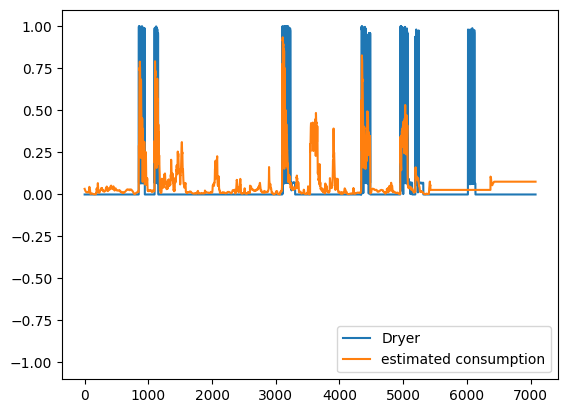

In [ ]:
plot_window(model_1, 1035, 1065, 0, x_test_1, y_test_1)

The dryer consumption is estimated well but some times a peack is estimated without the Dryer to be turned on

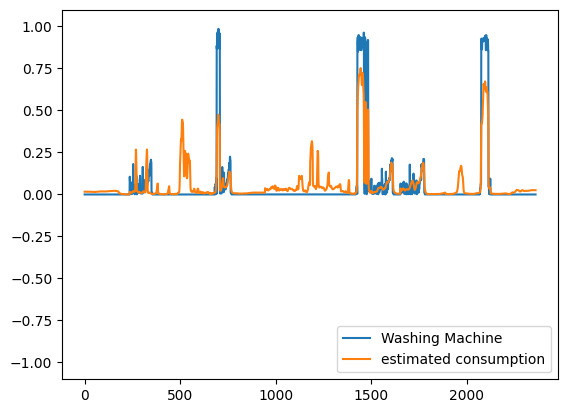

In [ ]:
plot_window(model_1, 50, 60, 1, x_test_1, y_test_1)

for the washing machine the consumption pattern is a little more confusing but the result is similar, most of the peack have been succesfully detected with some false positive

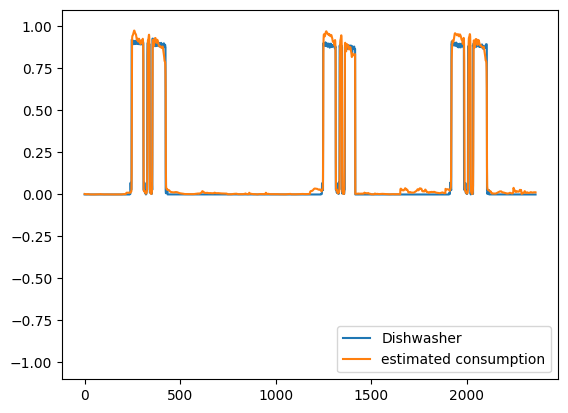

In [ ]:
plot_window(model_1, 15, 25, 2, x_test_1, y_test_1)

good results from the dishwasher

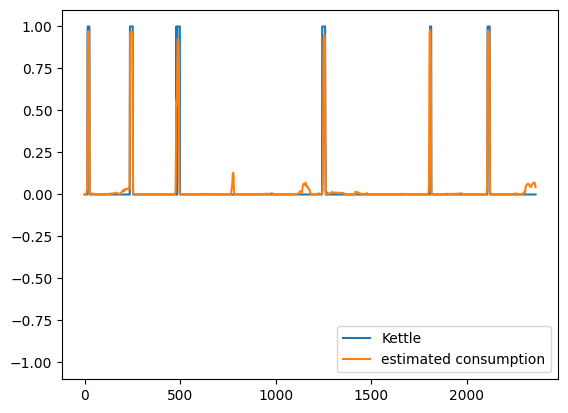

In [ ]:
plot_window(model_1, 530, 540, 3, x_test_1, y_test_1)

excellent results from the Kettle

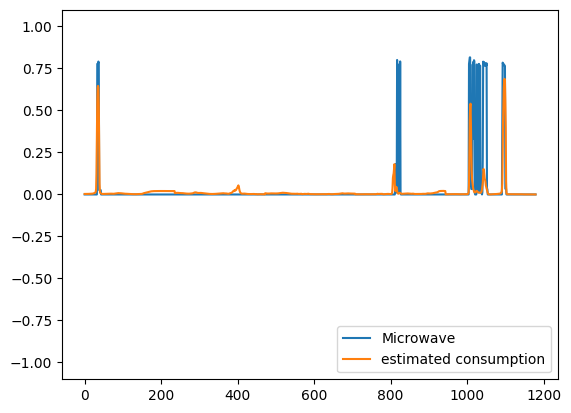

In [ ]:
plot_window(model_1, 183, 188, 4, x_test_1, y_test_1)

while for the microwave the results are a little disappointing to me since only a small part of the peaks get detected, in my opinion this is a related to the fact that Microwave have different modes (that lead to different signatures) and can stay on for a different amount of time

This results have been showed using only 5 appliances since having more appliances lead to a longer training time, anyway different combination of appliances has been tested, to summarize the not shown results:

-the electric heater is the applyance that get better approximated

-also a decent approximation is given for Fridges and Freezers

In [ ]:
model_1.save_weights(DATA_PATH + 'model_weights_1.h5')

## Training with houses only in source domain

Now we want to train the model only on houses on the source domain and then evaluate it also on the target domain

In [ ]:
target_domain=[11,21]
eliminated_houses=[0,14]
source_domain=list(range(22))
for element in target_domain:
      source_domain.remove(element)
for element in eliminated_houses:
      source_domain.remove(element)

(x_train_2, y_train_2, x_test_2, y_test_2, x_validation_2, y_validation_2)=load_data(source_domain)
model_2=run_model(x_train_2, y_train_2, x_validation_2, y_validation_2)


Creating the model...

Training...
Epoch 1/200
205/205 [==============================] - 23s 99ms/step - loss: 0.1240 - val_loss: 0.0882
Epoch 2/200
205/205 [==============================] - 20s 100ms/step - loss: 0.0957 - val_loss: 0.2312
Epoch 3/200
205/205 [==============================] - 20s 97ms/step - loss: 0.0966 - val_loss: 0.0949
Epoch 4/200
205/205 [==============================] - 20s 97ms/step - loss: 0.0920 - val_loss: 0.0980
Epoch 5/200
205/205 [==============================] - 20s 97ms/step - loss: 0.0943 - val_loss: 0.0925
Epoch 6/200
205/205 [==============================] - 20s 97ms/step - loss: 0.0889 - val_loss: 0.0910


In [ ]:
#loss function evaluated on source domain
loss=evaluate_on_target_houses(model_2, source_domain)

237/237 [==============================] - 2s 8ms/step - loss: 0.0866


In [ ]:
#loss function evaluated on target domain
loss=evaluate_on_target_houses(model_2, target_domain)

10/10 [==============================] - 0s 8ms/step - loss: 0.0466


In [ ]:
DATA_PATH = 'drive/MyDrive/Raw_data/'
model_2.save_weights(DATA_PATH + 'model_weights_2.h5')

## Domain adaptation with Coral Loss

the last step is to train the model using domain adaptation, to do that we need to redefine the model and the loss function

### loss modified for domain adaptation

the loss function will be the sum of the function used in the presvious model with a discrepancy loss function, I decided to use the coral loss function that consist in the Frobenious norm of the difference between the covariance matrix computed on source and target domain.

We are computing the adaptation loss considering the output of the last two dense layers that are respectively 128x236 and 64x236 considering the distribution over the rows (e.g. if we have a batch size of 128 the covariance matrix related to the first and the second layer is made of 236x128 rows)

Then to compute the Froebenius norm we subtract the two covariance matrixes of source and target domain and compute the sum of all squared element, the we divide by 4 times the number of element in the matrix

In [ ]:
def custom_loss_2(y_true, y_pred):

    #separation of outputs
    l1t = y_pred[:, :, 0:128]
    l1s = y_pred[:, :, 128:256]
    l2t = y_pred[:, :, 256:320]
    l2s = y_pred[:, :, 320:384]
    y_pred_1 = y_pred[:, :, 384:389]

    #tf.print("Shape:", tf.shape(y_pred))

    # masking
    mask = tf.cast(tf.logical_and(tf.greater_equal(y_true, 0), tf.less_equal(y_true, 1)), dtype=tf.float32)

    # application of the mask
    y_true_masked = tf.multiply(y_true, mask)
    y_pred_masked = tf.multiply(y_pred_1, mask)

    # Computing the loss
    loss = K.binary_crossentropy(y_true_masked, y_pred_masked)

    l1t=K.permute_dimensions(l1t, (2,1,0))
    l1s=K.permute_dimensions(l1s, (2,1,0))
    l2t=K.permute_dimensions(l2t, (2,1,0))
    l2s=K.permute_dimensions(l2s, (2,1,0))

    l1t=K.reshape(l1t, (128, -1))
    l1s=K.reshape(l1s, (128, -1))

    l2t=K.reshape(l2t, (64, -1))
    l2s=K.reshape(l2s, (64, -1))

    #number of samples
    nn=K.cast(K.shape(l1t)[1], dtype='float32')

    #computing covariances matrixes
    mean_vector_1_t = K.mean(l1t, axis=1, keepdims=True)
    cov_matrix_1_t = (K.dot(l1t, K.transpose(l1t)) - nn * K.dot(mean_vector_1_t, K.transpose(mean_vector_1_t))) / (nn - 1)


    mean_vector_1_s = K.mean(l1s, axis=1, keepdims=True)
    cov_matrix_1_s = (K.dot(l1s, K.transpose(l1s)) - nn * K.dot(mean_vector_1_s, K.transpose(mean_vector_1_s))) / (nn - 1)

    mean_vector_2_t = K.mean(l2t, axis=1, keepdims=True)
    cov_matrix_2_t = ( K.dot(l2t, K.transpose(l2t)) - nn * K.dot(mean_vector_2_t, K.transpose(mean_vector_2_t))) / (nn - 1)

    mean_vector_2_s = K.mean(l2s, axis=1, keepdims=True)
    cov_matrix_2_s = (K.dot(l2s, K.transpose(l2s)) - nn * K.dot(mean_vector_2_s, K.transpose(mean_vector_2_s))) / (nn - 1)

    #applying Froebenius norm
    frobenius_norm_1 = K.sum(K.square(cov_matrix_1_s-cov_matrix_1_t))
    frobenius_norm_2 = K.sum(K.square(cov_matrix_2_s-cov_matrix_2_t))

    #computing coral loss
    coral_1 = frobenius_norm_1/(4*128*128)
    coral_2 = frobenius_norm_2/(4*64*64)

    l2t=K.reshape(l2t, (64, -1))
    l2s=K.reshape(l2s, (64, -1))


    return loss + (coral_1+coral_2)

this other loss is able to manage the same input format but give as a result only the binary crossentropy loss function

In [ ]:
def custom_loss_3(y_true, y_pred):

    #separation of outputs
    l1t = y_pred[:, :, 0:128]
    l1s = y_pred[:, :, 128:256]
    l2t = y_pred[:, :, 256:320]
    l2s = y_pred[:, :, 320:384]
    y_pred_1 = y_pred[:, :, 384:(384+len(names))]

    # masking
    mask = tf.cast(tf.logical_and(tf.greater_equal(y_true, 0), tf.less_equal(y_true, 1)), dtype=tf.float32)

    # application of the mask
    y_true_masked = tf.multiply(y_true, mask)
    y_pred_masked = tf.multiply(y_pred_1, mask)

    # Computing the loss
    loss = K.binary_crossentropy(y_true_masked, y_pred_masked)
    return loss

### model modified for domain adaptation

the model have been modified: the layers and structure is still the same but is made able to manage two inputs, one coming from the target domain and the other from the source domain, then the prediction of appliances consumption (the last layer) is computed only for the source domain, then the output of the first two linear layers both for target and source domain are concatenated with the predicted consumption.

In [ ]:
#definition of the model
def cnn_for_domain_adaptation(num_classes=len(names), print_summary=False):
  #input layer
  home_input_source = tf.keras.layers.Input((n+2*m,1))
  home_input_target = tf.keras.layers.Input((n+2*m,1))

  #definition of all the layers
  conv_1=tf.keras.layers.Conv1D(filters=64, kernel_size=128, strides=1, activation='relu')
  conv_2=tf.keras.layers.Conv1D(filters=128, kernel_size=64, strides=1, activation='relu')
  conv_3=tf.keras.layers.Conv1D(filters=256, kernel_size=32, strides=1, activation='relu')
  conv_4=tf.keras.layers.Conv1D(filters=512, kernel_size=16, strides=1, activation='relu')

  dense_1=tf.keras.layers.Dense(units=128, activation='relu')
  dense_2=tf.keras.layers.Dense(units=64, activation='relu')

  #convolutional part for source domain
  x_s = conv_1(home_input_source)
  x_s = tf.keras.layers.Dropout(0.2)(x_s)
  x_s = conv_2(x_s)
  x_s = tf.keras.layers.Dropout(0.2)(x_s)
  x_s = conv_3(x_s)
  x_s = tf.keras.layers.Dropout(0.2)(x_s)
  x_s = conv_4(x_s)
  #x_s = tf.keras.layers.Dropout(0.2)(x_s)

  #convolutional part for source domain
  x_t = conv_1(home_input_target)
  x_t = tf.keras.layers.Dropout(0.2)(x_t)
  x_t = conv_2(x_t)
  x_t = tf.keras.layers.Dropout(0.2)(x_t)
  x_t = conv_3(x_t)
  x_t = tf.keras.layers.Dropout(0.2)(x_t)
  x_t = conv_4(x_t)
  #x_t = tf.keras.layers.Dropout(0.2)(x_t)

  #linear part of source
  layer_1_s = dense_1(x_s)
  #x_s = tf.keras.layers.Dropout(0.2)(layer_1_s)
  layer_2_s = dense_2(layer_1_s)


  #linear part of target
  layer_1_t = dense_1(x_t)
  #x_t = tf.keras.layers.Dropout(0.2)(layer_1_t)
  layer_2_t = dense_2(layer_1_t)

  #output
  x_s = tf.keras.layers.Dropout(0.2)(layer_2_s)
  x_s = tf.keras.layers.Dense(units=num_classes, activation='sigmoid')(x_s)

  classification_out=tf.keras.layers.Concatenate()([layer_1_t, layer_1_s, layer_2_t, layer_2_s, x_s])
  #classification_out=x_s

  model = tf.keras.models.Model(inputs=[home_input_source, home_input_target], outputs=classification_out, name='cnn_for_domain_adaptation')

  if print_summary:
    print(model.summary())

  return model

model = cnn_for_domain_adaptation(print_summary=True)

Model: "cnn_for_domain_adaptation"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 472, 1)]     0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 472, 1)]     0           []                               
                                                                                                  
 conv1d_56 (Conv1D)             (None, 345, 64)      8256        ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 dropout_100 (Dropout)          (None, 345, 64)      0           ['conv1d_

### running

now we run the model using as target domain houses 11 and 21, and as source domain all other houses

In [ ]:
target_domain=[11,21]
eliminated_houses=[0,14]
source_domain=list(range(22))
for element in target_domain:
      source_domain.remove(element)
for element in eliminated_houses:
      source_domain.remove(element)

(x_train_target, y_train_target, x_test_target, y_test_target, x_validation_target, y_validation_target)=load_data(target_domain)
(x_train_source, y_train_source, x_test_source, y_test_source, x_validation_source, y_validation_source)=load_data(source_domain)

#extending train set of source domain to be of the same length of target domain
b=list(range(x_train_target.shape[1]))
c=random.choices(b, k=x_train_source.shape[1])
x_train_target_extended=x_train_target[:,c,:]

#same for the validation set
b=list(range(x_validation_target.shape[1]))
c=random.choices(b, k=x_validation_source.shape[1])
x_validation_target_extended=x_validation_target[:,c,:]

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

n_epochs = 200
batch_size = 128
print("\nCreating the model...")
model_4 = cnn_for_domain_adaptation()
model_4.compile(loss=custom_loss_2, optimizer='adam')
model_4.optimizer.lr = 0.0005

print("\nTraining...")
history = model_4.fit(x=[x_train_source[0], x_train_target_extended[0]],
                    y=y_train_source[0],
                    batch_size = batch_size,
                    validation_data = ([x_validation_source[0], x_validation_target_extended[0]], y_validation_source[0]),
                    epochs = n_epochs,
                    callbacks=[early_stopping])


Creating the model...

Training...
Epoch 1/200
205/205 [==============================] - 45s 200ms/step - loss: 0.1385 - val_loss: 0.0930
Epoch 2/200
205/205 [==============================] - 42s 205ms/step - loss: 0.0980 - val_loss: 0.0895
Epoch 3/200
205/205 [==============================] - 41s 201ms/step - loss: 0.0947 - val_loss: 0.0935
Epoch 4/200
205/205 [==============================] - 41s 202ms/step - loss: 0.0915 - val_loss: 0.1095
Epoch 5/200
205/205 [==============================] - 41s 202ms/step - loss: 0.0961 - val_loss: 0.0889
Epoch 6/200
205/205 [==============================] - 41s 201ms/step - loss: 0.0886 - val_loss: 0.0942
Epoch 7/200
205/205 [==============================] - 41s 201ms/step - loss: 0.0897 - val_loss: 0.0844
Epoch 8/200
205/205 [==============================] - 41s 201ms/step - loss: 0.0864 - val_loss: 0.0853
Epoch 9/200
205/205 [==============================] - 41s 201ms/step - loss: 0.0863 - val_loss: 0.0866
Epoch 10/200
205/205 [======

In [ ]:
model_4.save_weights(DATA_PATH + 'model_weights_4.h5')

### evaluation

In [ ]:
def evaluate_on_target_houses_2(model, target_domain):
  (x_train, y_train, x_test, y_test, x_validation, y_validation)=load_data(target_domain)
  loss = model.evaluate([x_test[0], x_test[0]], y_test[0])
  return loss

In [ ]:
#loss function evaluated on source domain
model_4.compile(loss=custom_loss_3, optimizer='adam')
loss=evaluate_on_target_houses_2(model_4, target_domain)

10/10 [==============================] - 1s 14ms/step - loss: 0.0426


## Final comparison

In [ ]:
DATA_PATH = 'drive/MyDrive/Raw_data/'

model_1=cnn_for_NILM()
model_1.load_weights(DATA_PATH + 'model_weights_1.h5')

model_2=cnn_for_NILM()
model_2.load_weights(DATA_PATH + 'model_weights_2.h5')

model_4=cnn_for_domain_adaptation()
model_4.load_weights(DATA_PATH + 'model_weights_4.h5')

NameError: ignored

In [ ]:
def plot_window_for_comparison(start, end, appliance, x_test, y_test):
  y1=[]
  y2=[]
  y3=[]
  y4=[]
  y5=[]
  for win in range(start,end):
    y_1=model_1(x_test[:,win])
    y_2=model_2(x_test[:,win])
    y_3=model_4([x_test[:,win],x_test[:,win]])[:,:,384:389]

    y1=y1+np.transpose(y_test[0][win])[appliance].tolist()

    y2=y2+np.transpose(y_1)[appliance].tolist()
    y3=y3+np.transpose(y_2)[appliance].tolist()
    y4=y4+np.transpose(y_3)[appliance].tolist()

  plt.plot(range(len(y1)), y1, label=names[appliance])
  plt.plot(range(len(y2)), y2, label='trained on all')
  plt.plot(range(len(y4)), y4, label='domain_adaptation', color='red')
  plt.plot(range(len(y3)), y3, label='trained only on source')


  plt.legend(loc="lower right")
  plt.ylim(-1.1,1.1)

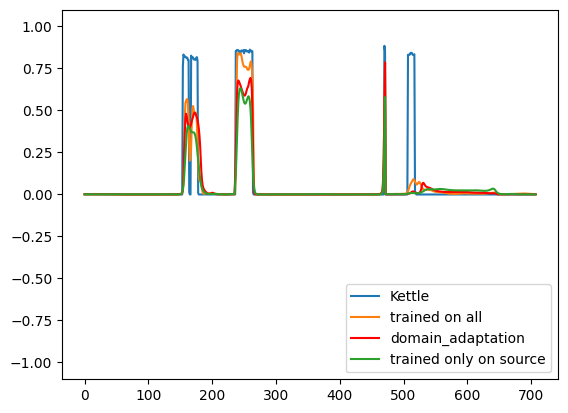

In [ ]:
plot_window_for_comparison(23, 26, 3, x_test_target, y_test_target)

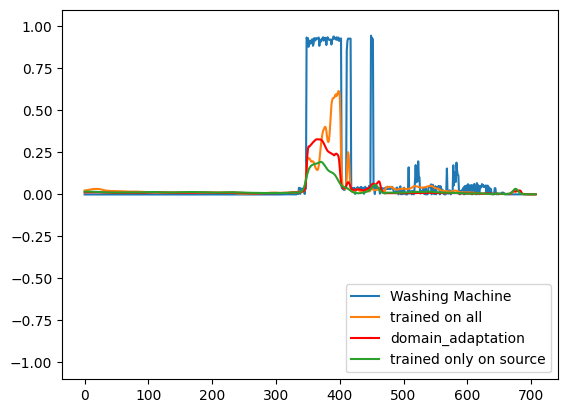

In [ ]:
plot_window_for_comparison(252, 255, 1, x_test_target, y_test_target)

results in evaluations are the expected ones, the model trained with domain adaptation performed better than the model trained only on source domain and its evaluation is closer to the full supervised approach

-loss on full supervised: 0.04

-loss on model trained only on source domain: 0.0466

-loss on domain adaptation: 0.0426

there is a bit of variance in the previous result from a run to another in the order of 0.001.

The target domain is already pretty similar to the source domain, this allows the model to perform is a decent way even without the transfer learning technique